## Analysis of CTA L-ridership and population trends from 2014 to 2019 in Chicago Community Areas for loop and surrounding areas

### Description

In Chicago, the nine CTA L-lines (Red, Blue, Brown, Green, Orange, Pink, Purple, Purple Express, and Yellow) allow travelers to go to all major Chicagoland areas near the vicinity of the city.

In this project, we will use the CTA L Line ridership data from years, 2014 to 2019, and the population data for each Chicago Community Areas (2000, 2010, 2017) to understand ridership, and population trends and depict patterns.

### Project Goals:

1. Determine total CTA L-ridership trend from 2014 to 2019 for all CTA L-Lines combined together
2. Perform ridership analysis by each of the nine individual CTA L-Lines for 2014 to 2019
3. Perform L-Loop Stations ridership analysis (Clark/Lake, State/Lake, Lake/State, Washington/Dearborn, Monroe/State, Adams/Wabash, Washington/Wabash, Harrison, LaSalle, LaSalle/Van Buren, Quincy/Wells, Washington/Wells) Merchandise Mart, Monroe/Dearborn, Jackson/Dearborn
4. Determine the population trends near the community areas around the loop and surrounding loop areas

### Insights Generated

####  A. Overall CTA L ridership declined by 8.1% from 2014 to 2019 

1. The total L-ridership declined by 8.1% from 2014 to 2019

#### B. Purple, Orange, Yellow, Pink and Red Lines saw double digit percent decline from 2014 to 2019
**Purple Line saw a maximum decline (52%)**
1. Purple Line ridership decreased by 52%
2. Orange Line ridership decreased by 38.4%
3. Pink Line ridership decreased by 36.6% 
4. Yellow Line ridership decreased by 18.1%
5. Red Line ridership decreased by 12.9% 

**Blue Line saw the smallest decline in ridership from 2014 to 2019 (-2.5%)**
1. Blue line ridership decreased by 2.5% 

#### C. Ridership in the loop (16 stations combined) saw 8.4% increase from 2014 to 2019. 
1. The combined ridership at all 16 stations in the loop saw an increase by 8.4% from 2014 to 2019


#### D. L-Stations along Washington Street saw the largest increase in ridership from 2014 to 2019

1. Two stations - Washington/Wells, Washington/Dearborn saw an increase in the ridership from 2014 to 2019 (21.7 and 7.3%). Washington/Wabash station was opened in August 2017, so full year data only available for 2018 and 2019. The ridership at Washington/Wabash decreased by 1.7%

#### E. The population in the loop (Chicago Community Area 32) saw a 22.5 % increase in the population from 2010 to 2017. 
 

### Key Takeaways

1. It is interesting to note that even if the overall L- ridership declined from 2014 to 2019 by 8.1%, the Chicago Loop ridership (within the Chicago Loop) increased by 8.4%.
2. This trend correlates with the CCA 32 population trend data which saw a 22.5% increase in the loop population from 2010 to 2017.
3. A closer look at the loop station ridership showed that the increase in ridership was mainly in a few stations (State/Lake, Washington/Wells, Washington/Dearborn, Monroe/Dearborn, Merchandise Mart, Clark/Lake, LaSalle/Van Buren) - increase range of 22.3 - 1.1 %.
4. Based on the data available for the loop stations along Washington St, the increase in ridership was localized to these stations (predominantly Washington/Wells and Washington/Dearborn). This may be because of the close proximity of these stations to the Ogilvie Transpiration Center which is the connection hub for the Chicago Suburban population which works in the Chicago Loop. (Suburban Rail lines - Metra)

### Data Sources

Sourcing the Data:
The advent of the era of data science has led to the City of Chicago publishing and providing access to huge number of datasets covering numerous subjects - from the latest COVID19 dataset to CTA’s L-ridership, L-stops, Taxi rides, Transportation Network Providers (TNP) datasets. The datasets are housed in the “Chicago Data Portal” and can be easily accessed through APIs or can be downloaded for analysis.
1. CTA Ridership data API: https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Monthly-Day-Type-A/t2rn-p8d7
2. CTA L-Map Stops data API: https://data.cityofchicago.org/resource/8pix-ypme
3. Chicago Community Areas Data: https://datahub.cmap.illinois.gov/dataset/1d2dd970-f0a6-4736-96a1-3caeb431f5e4/resource/96bc2e7d-9276-4d66-8cbf-63a0ed09a2a2/download/CDSarchive201906.zip

### Resource Sites for Python and Pandas coding

The following sites and resources were used to gain knowledge about CTA Ridership and problem solve coding and formatting issues:
1. https://stackoverflow.com
2. https://www.w3schools.com
3. https://black.now.sh
4. https://towardsdatascience.com/exploring-and-visualizing-chicago-transit-data-using-pandas-and-bokeh-part-ii-intro-to-bokeh-5dca6c5ced10
5. https://www.makeareadme.com
6. https://www.pandas.pydata.org
7. https://www.python.org


### Import the libraries and packages

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns
import matplotlib.font_manager as font_manager
import math
import warnings
warnings.filterwarnings('ignore')

### Import the CTA L-ridership data and the CTA L-map stops data into pandas dataframe

In [309]:
#Get the Data 1 and 2 Files Use API to connect with the portal and get the data

# DataFrame 1: CTA L-ridership data
#Get the entire ridership data from 2001 to 2020(Q1)

l_rides = pd.read_csv("https://data.cityofchicago.org/resource/t2rn-p8d7.csv?%24limit=350000")
l_rides.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday_holiday_rides,monthtotal
0,40900,Howard,2001-01-01T00:00:00.000,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,2001-01-01T00:00:00.000,1489.1,1054.0,718.0,40567
2,40100,Morse,2001-01-01T00:00:00.000,4412.5,3064.5,2087.8,119772
3,41300,Loyola,2001-01-01T00:00:00.000,4664.5,3156.0,1952.8,125008
4,40760,Granville,2001-01-01T00:00:00.000,3109.8,2126.0,1453.8,84189


In [310]:
# Check the data for any null values

l_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   station_id                33760 non-null  int64  
 1   stationame                33760 non-null  object 
 2   month_beginning           33760 non-null  object 
 3   avg_weekday_rides         33760 non-null  float64
 4   avg_saturday_rides        33760 non-null  float64
 5   avg_sunday_holiday_rides  33760 non-null  float64
 6   monthtotal                33760 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.8+ MB


### CTA L-Ridership data - create new columns for month and year

In [311]:
# Add date_time, year and month columns to the data set

l_rides['date_time'] = pd.to_datetime(l_rides['month_beginning'])
l_rides["month"] = l_rides["date_time"].dt.month
l_rides["year"] = l_rides["date_time"].dt.year

# getting 2014 to 2020 ridership data - a total of 11,639 rows and 10 columns

l_2014_2020_rides = l_rides[(l_rides['year'] > 2013) & (l_rides['year'] <= 2020)]
l_2014_2020_rides.shape
l_2014_2020_rides.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday_holiday_rides,monthtotal,date_time,month,year
22121,40900,Howard,2014-01-01T00:00:00.000,5665.7,4130.3,3042.2,156378,2014-01-01,1,2014
22122,41190,Jarvis,2014-01-01T00:00:00.000,1509.8,1363.0,1025.6,43795,2014-01-01,1,2014
22123,40100,Morse,2014-01-01T00:00:00.000,3652.2,3075.5,2350.6,104404,2014-01-01,1,2014
22124,41300,Loyola,2014-01-01T00:00:00.000,5831.0,4617.3,3299.8,163251,2014-01-01,1,2014
22125,40760,Granville,2014-01-01T00:00:00.000,3834.7,3228.5,2403.2,109294,2014-01-01,1,2014


### Import the CTA L-map stops data

In [312]:
l_map_stops = pd.read_csv('https://data.cityofchicago.org/resource/8pix-ypme.csv',sep=',')
l_map_stops.head()

,stop_id,direction_id,stop_name,station_name,station_descriptive_name,map_id,ada,red,blue,g,brn,p,pexp,y,pnk,o,location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [313]:
# There are duplicate values for map ID column since it counts the stops for trains going in both directions.
# There are a total of 143 unique stop_ids
# We need to keep only one row and drop the duplicate row.

l_map_stops['map_id'].unique().size

143

### Add the x and y coordinates for each L stop 
### Drop the duplicate rows

In [315]:
# Source referenced: https://towardsdatascience.com/exploring-and-visualizing-chicago-transit-data-using-pandas-and-bokeh-part-ii-intro-to-bokeh-5dca6c5ced10
# Use the function to create the x and y coordinates for each l-stop
# Add the co-ordinates to each L-stop
# Create a xycoord function to generate the location into coordinates 

def xycoord(Coords):
    Coordinates = literal_eval(Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]

    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

l_map_stops['coords_x'] = l_map_stops['location'].apply(lambda x: xycoord(x)[0])
l_map_stops['coords_y'] = l_map_stops['location'].apply(lambda x: xycoord(x)[1])
l_map_stops[['location', 'coords_x', 'coords_y']].head()

# Drop duplicates since each stop is for going to and going from directions. All other data stays same
# Verify that there are only 143 rows

l_map_stops.drop_duplicates(subset='map_id', keep="last", inplace=True)
l_map_stops.groupby([l_map_stops['map_id']]).count()

,stop_id,direction_id,stop_name,station_name,station_descriptive_name,ada,red,blue,g,brn,p,pexp,y,pnk,o,location,coords_x,coords_y
map_id,,,,,,,,,,,,,,,,,,
40010,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
40020,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
40030,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
40040,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
40050,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41660,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
41670,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
41680,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Change the column name 'map_id' in L-map Stops dataset to 'station_id' 
### This will allow merging of the two data sets on the station_id column values

In [316]:
# Change the column name "map_id" to match the name in the l_2014_2020_rides column name which is "station_id" 
#This will allow us to merge the two dataframes 
#The new merged dataframe now contains the line information added for each station.

l_map_stops.rename(columns = {'map_id':'station_id'}, inplace = True)
l_map_stops.head()

,stop_id,direction_id,stop_name,station_name,station_descriptive_name,station_id,ada,red,blue,g,brn,p,pexp,y,pnk,o,location,coords_x,coords_y
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)",-9.759285e+06,5.139718e+06
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)",-9.760562e+06,5.135452e+06
5,30213,N,35-Bronzeville-IIT (Harlem-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)",-9.754462e+06,5.135799e+06
7,30245,N,43rd (Harlem-bound),43rd,43rd (Green Line),41270,True,False,False,True,False,False,False,False,False,False,"(41.816462, -87.619021)",-9.753705e+06,5.133526e+06
9,30209,N,47th (Harlem-bound),47th,47th (Green Line),41080,True,False,False,True,False,False,False,False,False,False,"(41.809209, -87.618826)",-9.753683e+06,5.132443e+06


### Merge (Left Join) the CTA L-Rides dataset and the L-Map Stops dataset on the column station_id



In [262]:
# Merge the DataFrames together on station_id (data) 
# This gives us the ridership across all the L-stops between 2014 and 2020.
# Left Joined the ridership data with the L-stop data so that all the ridership rows are included.

merged_rides_lines = pd.merge(left=l_2014_2020_rides, right=l_map_stops, how='left', left_on='station_id', right_on='station_id')

# merged_rides_lines.info()

# There are 110 null values

merged_rides_lines.head()


,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday_holiday_rides,monthtotal,date_time,month,year,...,g,brn,p,pexp,y,pnk,o,location,coords_x,coords_y
0,40900,Howard,2014-01-01T00:00:00.000,5665.7,4130.3,3042.2,156378,2014-01-01,1,2014,...,False,False,True,True,True,False,False,"(42.019063, -87.672892)",-9.759702e+06,5.163835e+06
1,41190,Jarvis,2014-01-01T00:00:00.000,1509.8,1363.0,1025.6,43795,2014-01-01,1,2014,...,False,False,False,False,False,False,False,"(42.015876, -87.669092)",-9.759279e+06,5.163358e+06
2,40100,Morse,2014-01-01T00:00:00.000,3652.2,3075.5,2350.6,104404,2014-01-01,1,2014,...,False,False,False,False,False,False,False,"(42.008362, -87.665909)",-9.758924e+06,5.162232e+06
3,41300,Loyola,2014-01-01T00:00:00.000,5831.0,4617.3,3299.8,163251,2014-01-01,1,2014,...,False,False,False,False,False,False,False,"(42.001073, -87.661061)",-9.758385e+06,5.161140e+06
4,40760,Granville,2014-01-01T00:00:00.000,3834.7,3228.5,2403.2,109294,2014-01-01,1,2014,...,False,False,False,False,False,False,False,"(41.993664, -87.659202)",-9.758178e+06,5.160030e+06


### Replace na values with 0 for the stop_id feature and with 'noname' for stop_name, direction_id, station_name and station_descriptive_name

In [263]:
#Filled the na rows and columns with their corresponding values as in the ridership datafile

merged_rides_lines.stop_id = merged_rides_lines.stop_id.fillna(0)
merged_rides_lines.stop_name = merged_rides_lines.stop_name.fillna('noname')
merged_rides_lines.direction_id = merged_rides_lines.direction_id.fillna('noname')
merged_rides_lines.station_name = merged_rides_lines.station_name.fillna('noname')
merged_rides_lines.station_descriptive_name = merged_rides_lines.station_descriptive_name.fillna('noname')

### Replacing the nan values for the line type feature with True for g, pink, orange, brown and purple lines
### Replacing the nan values for the line type feature with False for red, blue and pepx lines

In [317]:
# Check for Null Values:
# The following fetaures have NANs: stop_id, stop_name, direction_id, station_name
# The values for the ada feature will be 'nodata'
# The two L stops which were closed in 2017 were Randolph/Wabash and Madison/Wabash. 
# These two stops therefore have nan values and they will be replaced with True (for the lines which had these stops)
# Green, Pink, Orange, Brown, Purple and False for Blue, Red, PEXP and Yellow


merged_rides_lines.ada = merged_rides_lines.ada.fillna('nodata')
merged_rides_lines.pnk = merged_rides_lines.pnk.fillna(True)
merged_rides_lines.brn = merged_rides_lines.brn.fillna(True)
merged_rides_lines.g = merged_rides_lines.g.fillna(True)
merged_rides_lines.o = merged_rides_lines.o.fillna(True)
merged_rides_lines.p = merged_rides_lines.p.fillna(True)
merged_rides_lines.red = merged_rides_lines.red.fillna(False)
merged_rides_lines.blue = merged_rides_lines.blue.fillna(False)
merged_rides_lines.pexp = merged_rides_lines.pexp.fillna(False)
merged_rides_lines.y = merged_rides_lines.y.fillna(False)

merged_rides_lines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11639 entries, 0 to 11638
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   station_id                11639 non-null  int64         
 1   stationame                11639 non-null  object        
 2   month_beginning           11639 non-null  object        
 3   avg_weekday_rides         11639 non-null  float64       
 4   avg_saturday_rides        11639 non-null  float64       
 5   avg_sunday_holiday_rides  11639 non-null  float64       
 6   monthtotal                11639 non-null  int64         
 7   date_time                 11639 non-null  datetime64[ns]
 8   month                     11639 non-null  int64         
 9   year                      11639 non-null  int64         
 10  stop_id                   11639 non-null  float64       
 11  direction_id              11639 non-null  object        
 12  stop_name         

### CTA L-Ridership declined by 8.1% from 2014. to 2019

In [318]:
# Analysis 1 - Total CTA Ridership
# Sub-analysis 1.1 - All lines overall ridership analysis (2014-2019)

l_2014_2020_rides = l_2014_2020_rides[(l_2014_2020_rides['year'] == 2014) | (l_2014_2020_rides['year'] == 2019)]
cta_ridership_201419 = pd.DataFrame(l_2014_2020_rides.groupby(['year'])['monthtotal', ].sum())
cta_ridership_201419.reset_index()

cta_ridership_percent_change = cta_ridership_201419.pivot_table(columns = 'year', values = 'monthtotal')
cta_ridership_percent_change['percent_change_2014_2019'] = 100 * (cta_ridership_percent_change[2019] - cta_ridership_percent_change[2014])/(cta_ridership_percent_change[2014])
cta_ridership_percent_change

year,2014,2019,percent_change_2014_2019
monthtotal,194826886,179071205,-8.087016


<Figure size 360x360 with 0 Axes>

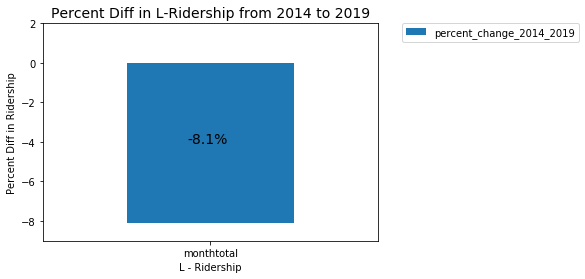

In [319]:
# Bar plot of the percent change in overall CTA L-Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = cta_ridership_percent_change.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('L - Ridership')
ax.set_ylabel('Percent Diff in Ridership')
ax.set_title("Percent Diff in L-Ridership from 2014 to 2019", size = 14)
plt.ylim(-9,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

### Ridership Data Frame by year (2014 and 2019) and by Line

In [267]:
merged_rides_lines201419 = merged_rides_lines[(merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019)]

merged_rides_line = pd.DataFrame(merged_rides_rlines201419.groupby(['year','monthtotal'])['red', 'blue', 'g', 'brn', 'p', 'pexp', 'y', 'o', 'pnk'].sum())
merged_rides_line = merged_rides_line.reset_index()
merged_rides_line

,year,monthtotal,red,blue,g,brn,p,pexp,y,o,pnk
0,2014,43025,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,43795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014,45038,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014,45947,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,46612,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
665,2019,551602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,2019,557473,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,2019,570382,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,2019,572898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create a function to get the CTA line based ridership data between 2014 and 2019
### From 2014 to 2019, the ridership was observed to decline for all the lines 


Line Name: RED


<Figure size 360x360 with 0 Axes>

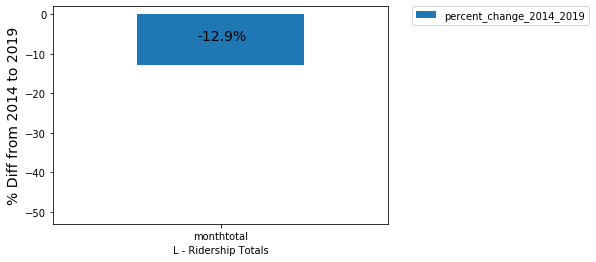


Line Name: BLUE


<Figure size 360x360 with 0 Axes>

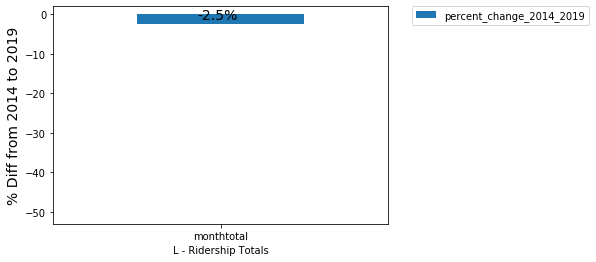


Line Name: BRN


<Figure size 360x360 with 0 Axes>

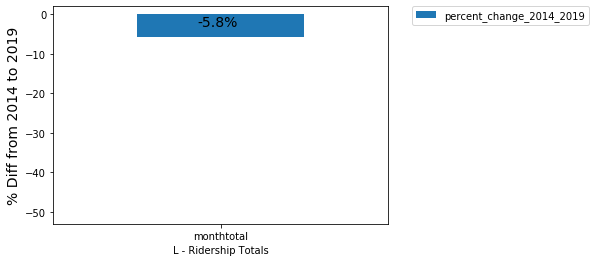


Line Name: O


<Figure size 360x360 with 0 Axes>

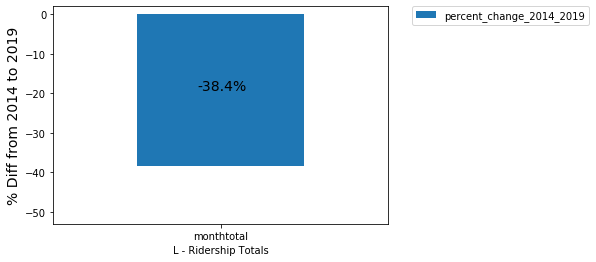


Line Name: P


<Figure size 360x360 with 0 Axes>

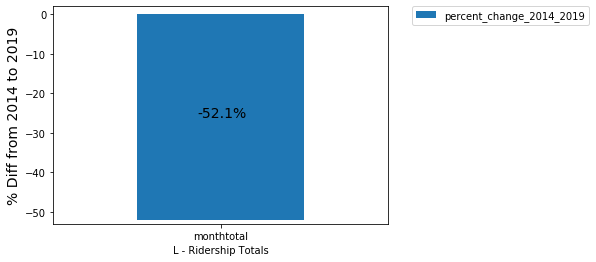


Line Name: Pexp


<Figure size 360x360 with 0 Axes>

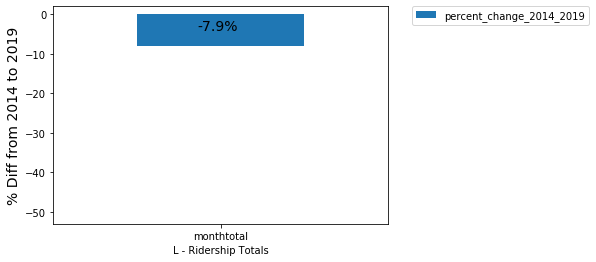


Line Name: PandPexp


<Figure size 360x360 with 0 Axes>

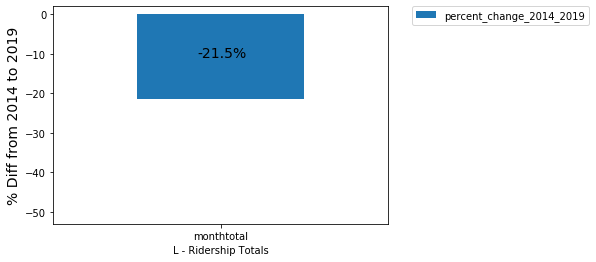


Line Name: G


<Figure size 360x360 with 0 Axes>

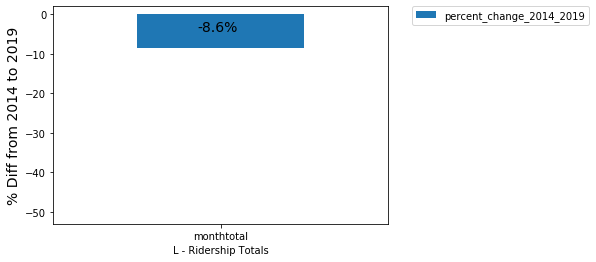


Line Name: Pnk


<Figure size 360x360 with 0 Axes>

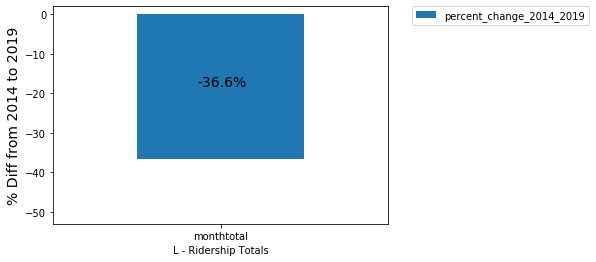


Line Name: Y


<Figure size 360x360 with 0 Axes>

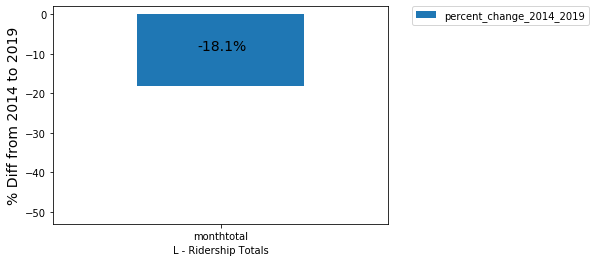

In [321]:
# Function to get ridership data by each L line

line_name = ""
start_year = 0
end_year = 0


def l_line_analysis(line_name, start_year, end_year):
    line_name = str(line_name)
    start_year = int(start_year)
    end_year = int(end_year)
    print("\nLine Name:", line_name)
    
    if line_name == 'RED':
        ridesby_line_year_range = merged_rides_lines[(merged_rides_lines['red'] == True) 
                                                     & ((merged_rides_lines['year'] == start_year) 
                                                        | (merged_rides_lines['year'] == end_year))]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()
              
    elif line_name == 'BLUE':
        ridesby_line_year_range = merged_rides_lines[(merged_rides_lines['blue'] == True) 
                                                     & ((merged_rides_lines['year'] == start_year) 
                                                        | (merged_rides_lines['year'] == end_year))]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()
        
    elif line_name == 'O':
        ridesby_line_year_range = merged_rides_lines[(merged_rides_lines['o'] == True) 
                                                     & ((merged_rides_lines['year'] == start_year) 
                                                        | (merged_rides_lines['year'] == end_year))]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()
        
    elif line_name == 'Pnk':
        ridesby_line_year_range = merged_rides_lines[(merged_rides_lines['pnk'] == True) 
                                                     & ((merged_rides_lines['year'] == start_year) 
                                                        | (merged_rides_lines['year'] == end_year))]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()
        
    elif line_name == "P":
        ridesby_line_year_range = merged_rides_lines[(merged_rides_lines['p'] == True) 
                                                     & ((merged_rides_lines['year'] == start_year) 
                                                        | (merged_rides_lines['year'] == end_year))]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()

    elif line_name == "Pexp":
        ridesby_line_year_range = merged_rides_lines[(merged_rides_lines['pexp'] == True) 
                                                     & ((merged_rides_lines['year'] == start_year) 
                                                        | (merged_rides_lines['year'] == end_year))]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()

    # This uses the OR boolean operator to capture both, the P or Pexp rides
    # In 2019 there were 0 P rides since both the stations Madison/Wabash and Randoplh/Wabash were dropped
    
    elif line_name == "PandPexp":
        ridesby_line_year_range = merged_rides_lines[
            ((merged_rides_lines["p"] == True)
            | (merged_rides_lines["pexp"] == True))
            & ((merged_rides_lines["year"] == start_year)
            | (merged_rides_lines["year"] == end_year))
        ]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()
    
    elif line_name == 'G':
        ridesby_line_year_range = merged_rides_lines[(merged_rides_lines['g'] == True) 
                                                     & ((merged_rides_lines['year'] == start_year) 
                                                        | (merged_rides_lines['year'] == end_year))]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()
        
    elif line_name == 'BRN':
        ridesby_line_year_range = merged_rides_lines[(merged_rides_lines['brn'] == True) 
                                                     & ((merged_rides_lines['year'] == start_year) 
                                                        | (merged_rides_lines['year'] == end_year))]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()
        
    elif line_name == 'Y':
        ridesby_line_year_range = merged_rides_lines[(merged_rides_lines['y'] == True) 
                                                     & ((merged_rides_lines['year'] == start_year) 
                                                        | (merged_rides_lines['year'] == end_year))]
        df = pd.DataFrame(ridesby_line_year_range.groupby('year')['monthtotal'].sum()).reset_index()
        
        
    df1 = df.reset_index()
    df1_percent_change201419 = df1.pivot_table(columns = 'year', values = 'monthtotal')
    df1_percent_change201419['percent_change_2014_2019'] = 100 * (df1_percent_change201419[2019] - df1_percent_change201419[2014])/(df1_percent_change201419[2014])
    df1_percent_change201419
    
    # Bar plot of the percent change in Purple and Purple Express Combined Line Ridership from 2014 to 2019

    plt.figure(figsize = (5,5))

    ax = df1_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
    ax.set_xlabel('L - Ridership Totals')
    ax.set_ylabel("% Diff from 2014 to 2019", size = 14)
    plt.ylim(-53,2)
    plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
    plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)

    # Annotate the bars with the values

    for p in ax.patches:
        n = '{:.1f}%'.format(p.get_height())
        x = p.get_x() + p.get_width() - 0.32    
        y1 = p.get_y() + p.get_height()/2
        ax.annotate(n, (x,y1), size = 14, color = 'black')
    
    plt.show()

def main():
    l_line_analysis('RED', 2014, 2019)
    l_line_analysis('BLUE', 2014, 2019)
    l_line_analysis('BRN', 2014, 2019)
    l_line_analysis('O', 2014, 2019)
    l_line_analysis('P', 2014, 2019)
    l_line_analysis('Pexp', 2014, 2019)
    l_line_analysis('PandPexp', 2014, 2019)
    l_line_analysis('G', 2014, 2019)
    l_line_analysis('Pnk', 2014, 2019)
    l_line_analysis('Y', 2014, 2019)


if __name__ == "__main__":
    main()



### CTA individual L- Line Ridership Analysis from 2014 to 2019
### All L - lines saw a decline in ridership from 2014 to 2019 
### Blue line saw the lowest decline (-2.5%)
### Purple Line saw the highest decline (-52%)

#### Red Line:

In [275]:
# Red Line Ridership from 2014 to 2019

merged_rides_rlines201419 = merged_rides_lines[(merged_rides_lines['red'] == True) & ((merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019))]
merged_rides_red_line = pd.DataFrame(merged_rides_rlines201419.groupby(['year'])['monthtotal'].sum()).reset_index()

red_line_percent_change201419 = merged_rides_red_line.pivot_table(columns = 'year', values = 'monthtotal')
red_line_percent_change201419['percent_change_2014_2019'] = 100 * (red_line_percent_change201419[2019] - red_line_percent_change201419[2014])/(red_line_percent_change201419[2014])
red_line_percent_change201419

year,2014,2019,percent_change_2014_2019
monthtotal,62839930,54758440,-12.860438


<Figure size 360x360 with 0 Axes>

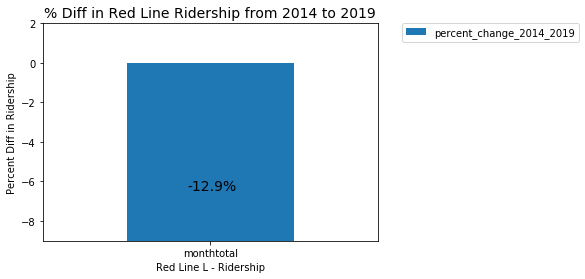

In [283]:
# Bar plot of the percent change in Red Line Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = red_line_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Red Line L - Ridership')
ax.set_ylabel('Percent Diff in Ridership')
ax.set_title("% Diff in Red Line Ridership from 2014 to 2019", size = 14)
plt.ylim(-9,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

#### Blue Line:

In [274]:
# Blue Line Ridership from 2014 to 2019

merged_rides_blines201419 = merged_rides_lines[(merged_rides_lines['blue'] == True) & ((merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019))]
merged_rides_blue_line = pd.DataFrame(merged_rides_blines201419.groupby(['year'])['monthtotal'].sum()).reset_index()

blue_line_percent_change201419 = merged_rides_blue_line.pivot_table(columns = 'year', values = 'monthtotal')
blue_line_percent_change201419['percent_change_2014_2019'] = 100 * (blue_line_percent_change201419[2019] - blue_line_percent_change201419[2014])/(blue_line_percent_change201419[2014])
blue_line_percent_change201419

year,2014,2019,percent_change_2014_2019
monthtotal,50520743,49238969,-2.537124


<Figure size 360x360 with 0 Axes>

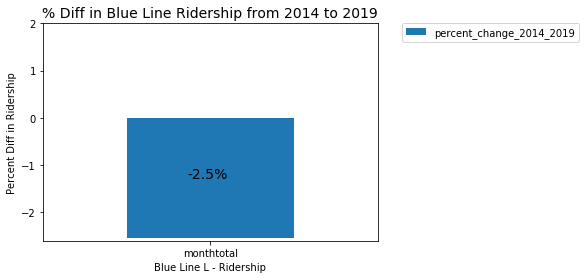

In [282]:
# Bar plot of the percent change in Blue Line Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = blue_line_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Blue Line L - Ridership')
ax.set_ylabel('Percent Diff in Ridership')
ax.set_title("% Diff in Blue Line Ridership from 2014 to 2019", size = 14)
plt.ylim(-2.6,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

#### Green Line:

In [273]:
# Green Line Ridership from 2014 to 2019

merged_rides_glines201419 = merged_rides_lines[(merged_rides_lines['g'] == True) & ((merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019))]
merged_rides_green_line = pd.DataFrame(merged_rides_glines201419.groupby(['year'])['monthtotal'].sum()).reset_index()


green_line_percent_change201419 = merged_rides_green_line.pivot_table(columns = 'year', values = 'monthtotal')
green_line_percent_change201419['percent_change_2014_2019'] = 100 * (green_line_percent_change201419[2019] - green_line_percent_change201419[2014])/(green_line_percent_change201419[2014])
green_line_percent_change201419



year,2014,2019,percent_change_2014_2019
monthtotal,22695317,20748617,-8.57754


<Figure size 360x360 with 0 Axes>

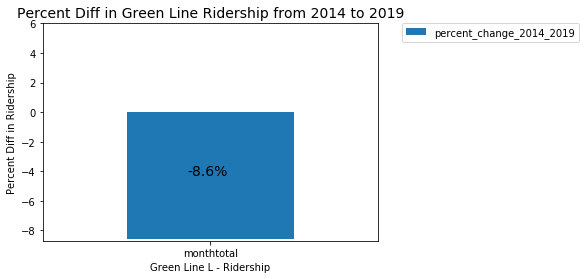

In [280]:
# Bar plot of the percent change in Green Line Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = green_line_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Green Line L - Ridership')
ax.set_ylabel('Percent Diff in Ridership')
ax.set_title("Percent Diff in Green Line Ridership from 2014 to 2019", size = 14)
plt.ylim(-8.7,6,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

#### Brown Line:

In [272]:
# Brown Line Ridership from 2014 to 2019

merged_rides_blines201419 = merged_rides_lines[(merged_rides_lines['brn'] == True) & ((merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019))]
merged_rides_brown_line = pd.DataFrame(merged_rides_blines201419.groupby(['year'])['monthtotal'].sum()).reset_index()

brown_line_percent_change201419 = merged_rides_brown_line.pivot_table(columns = 'year', values = 'monthtotal')
brown_line_percent_change201419['percent_change_2014_2019'] = 100 * (brown_line_percent_change201419[2019] - brown_line_percent_change201419[2014])/(brown_line_percent_change201419[2014])
brown_line_percent_change201419



year,2014,2019,percent_change_2014_2019
monthtotal,43862839,41297468,-5.848621


<Figure size 360x360 with 0 Axes>

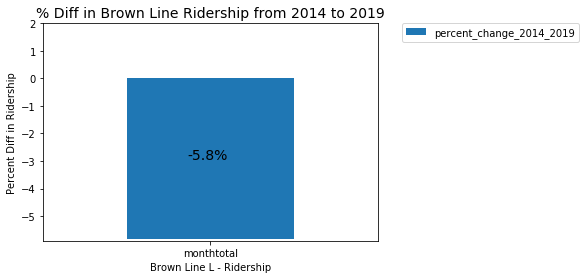

In [285]:
# Bar plot of the percent change in Brown Line Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = brown_line_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Brown Line L - Ridership')
ax.set_ylabel('Percent Diff in Ridership')
ax.set_title("% Diff in Brown Line Ridership from 2014 to 2019", size = 14)
plt.ylim(-5.9,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

#### Purple Line:

In [271]:
# Purple Line Ridership from 2014 to 2019

merged_rides_plines201419 = merged_rides_lines[(merged_rides_lines['p'] == True) & ((merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019))]
merged_rides_purple_line = pd.DataFrame(merged_rides_plines201419.groupby(['year'])['monthtotal'].sum()).reset_index()


purple_line_percent_change201419 = merged_rides_purple_line.pivot_table(columns = 'year', values = 'monthtotal')
purple_line_percent_change201419['percent_change_2014_2019'] = 100 * (purple_line_percent_change201419[2019] - purple_line_percent_change201419[2014])/(purple_line_percent_change201419[2014])
purple_line_percent_change201419

year,2014,2019,percent_change_2014_2019
monthtotal,9725589,4660881,-52.076106


<Figure size 360x360 with 0 Axes>

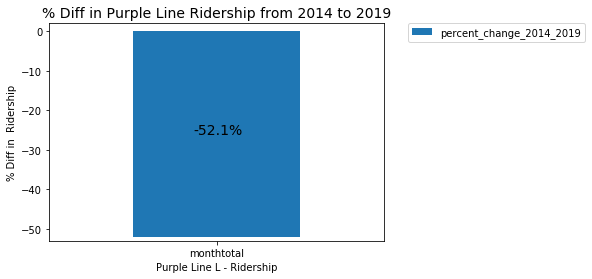

In [286]:
# Bar plot of the percent change in Purple Line Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = purple_line_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Purple Line L - Ridership')
ax.set_ylabel("% Diff in  Ridership")
ax.set_title("% Diff in Purple Line Ridership from 2014 to 2019", size = 14)
plt.ylim(-53,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

#### Purple and Purple Express Line:

In [26]:
# Purple and Purple Express Line Ridership from 2014 to 2019

merged_rides_ppexplines201419 = merged_rides_lines[((merged_rides_lines['p'] == True) | (merged_rides_lines['pexp'] == True)) & ((merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019))]
merged_rides_p_pexp__line = pd.DataFrame(merged_rides_ppexplines201419.groupby(['year'])['monthtotal'].sum())
merged_rides_p_pexp__line.reset_index()

ppexp_line_percent_change201419 = merged_rides_p_pexp__line.pivot_table(columns = 'year', values = 'monthtotal')
ppexp_line_percent_change201419['percent_change_2014_2019'] = 100 * (ppexp_line_percent_change201419[2019] - ppexp_line_percent_change201419[2014])/(ppexp_line_percent_change201419[2014])
ppexp_line_percent_change201419



year,2014,2019,percent_change_2014_2019
monthtotal,29739719,23354207,-21.471326


<Figure size 360x360 with 0 Axes>

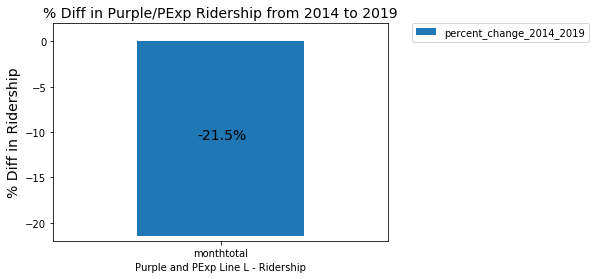

In [287]:
# Bar plot of the percent change in Purple and Purple Express Combined Line Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = ppexp_line_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Purple and PExp Line L - Ridership')
ax.set_ylabel("% Diff in Ridership", size = 14)
ax.set_title("% Diff in Purple/PExp Ridership from 2014 to 2019", size = 14)
plt.ylim(-22,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

#### Yellow Line:

In [288]:
# Yellow Line Ridership from 2014 to 2019

merged_rides_ylines201419 = merged_rides_lines[(merged_rides_lines['y'] == True) & ((merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019))]
merged_rides_yellow_line = pd.DataFrame(merged_rides_ylines201419.groupby(['year'])['monthtotal'].sum()).reset_index()


yellow_line_percent_change201419 = merged_rides_yellow_line.pivot_table(columns = 'year', values = 'monthtotal')
yellow_line_percent_change201419['percent_change_2014_2019'] = 100 * (yellow_line_percent_change201419[2019] - yellow_line_percent_change201419[2014])/(yellow_line_percent_change201419[2014])
yellow_line_percent_change201419



year,2014,2019,percent_change_2014_2019
monthtotal,3030198,2483102,-18.054794


<Figure size 360x360 with 0 Axes>

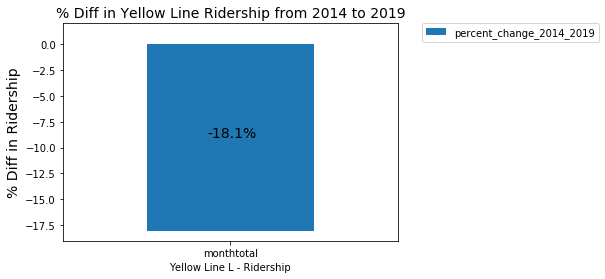

In [289]:
# Bar plot of the percent change in Yellow Line Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = yellow_line_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Yellow Line L - Ridership')
ax.set_ylabel("% Diff in Ridership", size = 14)
ax.set_title("% Diff in Yellow Line Ridership from 2014 to 2019", size = 14)
plt.ylim(-19,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

#### Orange Line:

In [290]:
# Orange Line Ridership from 2014 to 2019

merged_rides_olines201419 = merged_rides_lines[(merged_rides_lines['o'] == True) & ((merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019))]
merged_rides_orange_line = pd.DataFrame(merged_rides_olines201419.groupby(['year'])['monthtotal'].sum()).reset_index()

orange_line_percent_change201419 = merged_rides_orange_line.pivot_table(columns = 'year', values = 'monthtotal')
orange_line_percent_change201419['percent_change_2014_2019'] = 100 * (orange_line_percent_change201419[2019] - orange_line_percent_change201419[2014])/(orange_line_percent_change201419[2014])
orange_line_percent_change201419


year,2014,2019,percent_change_2014_2019
monthtotal,13281434,8182401,-38.392187


<Figure size 360x360 with 0 Axes>

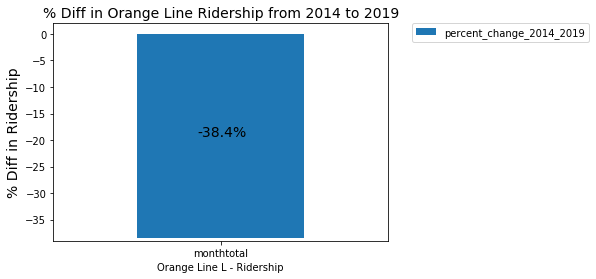

In [291]:
# Bar plot of the percent change in Orange Line Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = orange_line_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Orange Line L - Ridership')
ax.set_ylabel("% Diff in Ridership", size = 14)
ax.set_title("% Diff in Orange Line Ridership from 2014 to 2019", size = 14)
plt.ylim(-39,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

#### Pink Line:

In [292]:
# Pink Line Ridership from 2014 to 2019

merged_rides_pnklines201419 = merged_rides_lines[(merged_rides_lines['pnk'] == True) & ((merged_rides_lines['year'] == 2014) | (merged_rides_lines['year'] == 2019))]
merged_rides_pink_line = pd.DataFrame(merged_rides_pnklines201419.groupby(['year'])['monthtotal'].sum()).reset_index()

pink_line_percent_change201419 = merged_rides_pink_line.pivot_table(columns = 'year', values = 'monthtotal')
pink_line_percent_change201419['percent_change_2014_2019'] = 100 * (pink_line_percent_change201419[2019] - pink_line_percent_change201419[2014])/(pink_line_percent_change201419[2014])
pink_line_percent_change201419

year,2014,2019,percent_change_2014_2019
monthtotal,12491376,7923645,-36.567076


<Figure size 360x360 with 0 Axes>

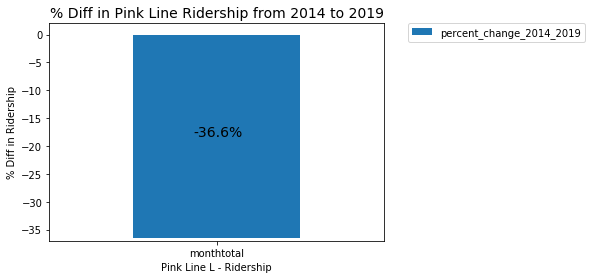

In [293]:
# Bar plot of the percent change in Pink Line Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = pink_line_percent_change201419.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Pink Line L - Ridership')
ax.set_ylabel("% Diff in Ridership")
ax.set_title("% Diff in Pink Line Ridership from 2014 to 2019", size = 14)
plt.ylim(-37,2)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

### Assess if there was a similar decline in the ridership specifically in the loop
### Ridership in the Chicago Loop CTA L- Stations increased by 8.4%

In [322]:
# These are the 16 Loop Stations:
# Clark/Lake,
# State/Lake, 
# Lake/State
# Monroe/State
# Jackson/State
# Adams/Wabash
# Harrison
# LaSalle
# LaSalle/Van Buren
# Quincy/Wells
# Merchandise Mart
# Monroe/Dearborn
# Jackson/Dearborn
# Washington/Dearborn
# Washington/Wells
# Washington/Wabash

# Group the data by stations and year and get the monthtotals for each station by year. 

cta_l_stations = merged_rides_lines.groupby(["stationame", "year"]).sum()
cta_l_stations.sort_values(ascending=False, by="monthtotal", inplace=True)

# Create a pivot table of the stations and the monthtotals for 2014 and 2019

l_stations_2014_19 = pd.pivot_table(data = cta_l_stations, index=["stationame", "year"], values=["monthtotal"])

# Select only the Loop Stations (16 stations)

loop_stations_2014_2019 = l_stations_2014_19.query('year == [2014, 2019] and stationame == ["Clark/Lake", "State/Lake", "Lake/State", "Monroe/State", "Jackson/State", "Adams/Wabash", "Harrison", "LaSalle", "LaSalle/Van Buren", "Quincy/Wells","Merchandise Mart", "Monroe/Dearborn", "Jackson/Dearborn", "Washington/Dearborn", "Washington/Wells", "Washington/Wabash"]').reset_index()
loop_stations_2014_19 = pd.pivot_table(data = loop_stations_2014_2019, index = 'stationame', columns = 'year', values = 'monthtotal').reset_index()

# Combined Loop ridership percent change in ridership from 2014 to 2019

combined_data = pd.DataFrame(loop_stations_2014_2019.groupby(['year'])['monthtotal', ].sum()).reset_index()

# Create a Pivot Table

combined_data_loop = combined_data.pivot_table(columns = 'year', values = 'monthtotal')
combined_data_loop['percent_change_2014_2019'] = 100 * (combined_data_loop[2019] - combined_data_loop[2014])/(combined_data_loop[2014])
combined_data_loop

year,2014,2019,percent_change_2014_2019
monthtotal,41346707,44813823,8.385471


<Figure size 360x360 with 0 Axes>

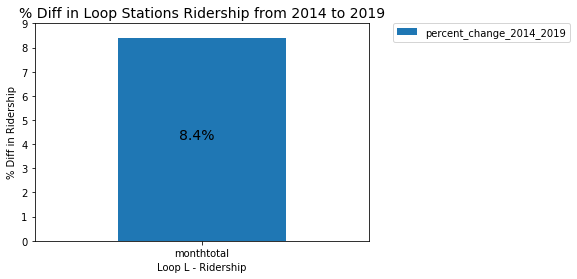

In [323]:
# Bar plot of the percent change in L- Loop Stations Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = combined_data_loop.plot(kind = 'bar', y = ['percent_change_2014_2019'])
ax.set_xlabel('Loop L - Ridership')
ax.set_ylabel("% Diff in Ridership")
ax.set_title("% Diff in Loop Stations Ridership from 2014 to 2019", size = 14)
plt.ylim(0,9)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.32    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

#### Percent change in ridership at each of the loop stations.
#### Largest increase was seen at State/Lake and Washington/Dearborn (22.3%, 21.71%)
#### Washington/Wabash was newly created after 2014 so there is no data for 2014.


In [297]:
# Calculate the percent change in ridership from 2014 to 2019 for each of the stations

loop_stations_2014_19['percent_change_2014_2019'] = 100 * (loop_stations_2014_19[2019] - loop_stations_2014_19[2014])/loop_stations_2014_19[2014]
loop_stations_2014_19.sort_values(by = 'percent_change_2014_2019', ascending = False, inplace = True)
loop_stations_2014_19

year,stationame,2014,2019,percent_change_2014_2019
12,State/Lake,3092206.0,3783187.0,22.345892
13,Washington/Dearborn,3431799.0,4176948.0,21.713072
15,Washington/Wells,2063759.0,2214522.0,7.305262
9,Monroe/Dearborn,2114139.0,2268194.0,7.286891
8,Merchandise Mart,2100263.0,2237817.0,6.549370
1,Clark/Lake,5573235.0,5830767.0,4.620871
6,LaSalle/Van Buren,820987.0,830063.0,1.105499
7,Lake/State,6536922.0,6450839.0,-1.316874
0,Adams/Wabash,2131441.0,2087483.0,-2.062361
5,LaSalle,907789.0,873340.0,-3.794825


### CCA Loop & surrounding areas population trend analysis

In [298]:
ohare_midway_cca_census = pd.read_csv("/Users/shilpakamath-jha/Desktop/SKJhaPythonProjects/ReferenceCCAProfiles20132017mergedCCAcopy.csv", sep = ',')
ohare_midway_cca_census.sort_values(ascending=True, by="chi_community_areas", inplace=True)
ohare_midway_cca_census.head()

,GEOG,chi_community_areas,2000_POP,2010_POP,TOT_POP,UND19,A20_34,A35_49,A50_64,A65_74,...,highly_walkable_pop_pct,highly_walkable_emp_pct,assoc_plus_pct,in_lbr_frc_pct,pct_pop_access_4_acres_per_1k,pct_pop_access_10_acres_per_1k,impervious_acres_per_hh,modhigh_ta_pop_pct,modhigh_ta_emp_pct,nonsov_pct
59,Rogers Park,1,63484,54991,55062,11632,17116,12560,8945,2757,...,1.000000,1.00000,0.470011,0.794076,0.000000,0.0,0.033327,1.0,1.0,0.629223
74,West Ridge,2,73199,71942,76215,20756,17065,15001,13648,5461,...,1.000000,1.00000,0.451531,0.771930,0.193019,0.0,0.052765,1.0,1.0,0.397698
66,Uptown,3,63551,56362,57973,7430,19857,13238,10339,3723,...,0.999962,0.89758,0.608137,0.818575,0.656498,0.0,0.030167,1.0,1.0,0.660165
39,Lincoln Square,4,44574,39493,41715,7356,13432,10428,6664,2179,...,1.000000,1.00000,0.671179,0.851232,0.000000,0.0,0.051369,1.0,1.0,0.551952
50,North Center,5,31895,31867,35789,8845,9902,9709,4375,1616,...,1.000000,1.00000,0.739185,0.899150,0.029571,0.0,0.060907,1.0,1.0,0.546646


### The Loop population increased by 22.5% from  2010 and 2017 

In [299]:
# Loop Population change from 2000 to 2010 and from 2010 to 2017
# CCA for The Loop is 32
# CCA for Midway is 56 
# TOT_POP stands for 2013-2017 data 

cca_data = pd.pivot_table(data = ohare_midway_cca_census, index = ['chi_community_areas','GEOG'], values=["2000_POP", "2010_POP", "TOT_POP"]).reset_index()
cca_data_32 = cca_data[cca_data['chi_community_areas'].isin(["32"])]
cca_data_32

# Calculate the percent change from 2000 to 2017 and 2010 to 2017

cca_data_32['percent_diff_2000_2010'] = (cca_data_32['2010_POP'] - cca_data_32['2000_POP'])*100/cca_data_32['2000_POP']
cca_data_32['percent_diff_2010_2017'] = (cca_data_32['TOT_POP']- cca_data_32['2010_POP'])*100/cca_data_32['2010_POP']
cca_data_32



# Format the 2000_pop, 2010_pop, tot_pop  values with commas to show numerical values clearly

cca_data_32['2000_POP'] = cca_data_32['2000_POP'].apply(lambda x: '{:,}'.format(x))
cca_data_32['2010_POP'] = cca_data_32['2010_POP'].apply(lambda x: '{:,}'.format(x))
cca_data_32['TOT_POP'] = cca_data_32['TOT_POP'].apply(lambda x: '{:,}'.format(x))

cca_data_32

,chi_community_areas,GEOG,2000_POP,2010_POP,TOT_POP,percent_diff_2000_2010,percent_diff_2010_2017
31,32,The Loop,"16,388","29,283","35,880",78.685624,22.528429


<Figure size 720x576 with 0 Axes>

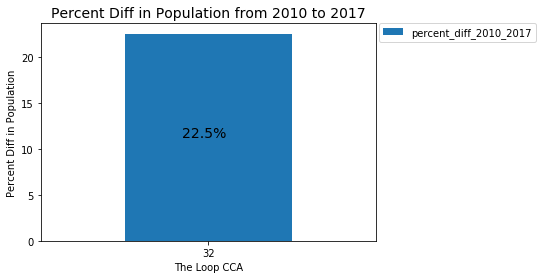

In [301]:
# Bar plot of the percent change in loop population from 2014 to 2019

plt.figure(figsize = (10,8))

ax = cca_data_32.plot(kind = 'bar', x = 'chi_community_areas', y = ['percent_diff_2010_2017'])
ax.set_xlabel('The Loop CCA')
ax.set_ylabel('Percent Diff in Population')
ax.set_title("Percent Diff in Population from 2010 to 2017", size = 14)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.33
    y = p.get_y() + p.get_height()/2 
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

### Deep dive into the Washington/Cross Roads Loop Stations (Washington/Wabash, Washington/Wells, Washington/Dearborn)

### The loop ridership at two of these stations saw an increase by 21.7% and 7.3% .
### Washington/Wabash Loop station opened in August 2107. Therefore the percent change in ridership from 2014 to 2019 could not be calculated. However, for 2019 the annual ridership was ~ 3.13 Million.

### This increase in the ridership concentrated around the Washington Street L-stations could possibly be related to the increase in the loop area population

In [302]:
washington_loop_stations_2014_2019 = loop_stations_2014_19.query('stationame == ["Washington/Dearborn", "Washington/Wells", "Washington/Wabash"]')
washington_loop_stations_2014_2019['percent_change_2014_2019'] = 100 * (washington_loop_stations_2014_2019[2019] - washington_loop_stations_2014_2019[2014])/washington_loop_stations_2014_2019[2014]
washington_loop_stations_2014_2019.sort_values(by = 'percent_change_2014_2019', ascending = False, inplace = True)
washington_loop_stations_2014_2019

year,stationame,2014,2019,percent_change_2014_2019
13,Washington/Dearborn,3431799.0,4176948.0,21.713072
15,Washington/Wells,2063759.0,2214522.0,7.305262
14,Washington/Wabash,NaN,3126070.0,NaN


<Figure size 360x360 with 0 Axes>

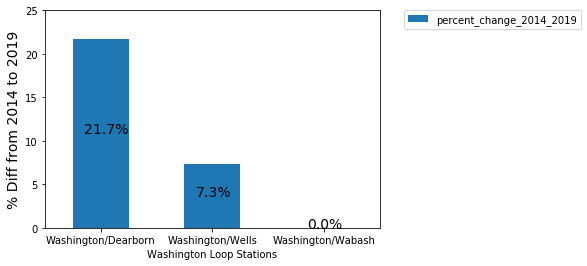

In [141]:
# Bar plot of the percent change in Washington Street Loop Stations Ridership from 2014 to 2019

plt.figure(figsize = (5,5))

ax = washington_loop_stations_2014_2019.plot(kind = 'bar', x = 'stationame', y = ['percent_change_2014_2019'])
ax.set_xlabel('Washington Loop Stations')
ax.set_ylabel("% Diff from 2014 to 2019", size = 14)
plt.ylim(0,25)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.4    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()

### Ridership at the Loop station - Washington/Wabash from 2018 to 2019 

In [324]:
merged_rides_lines201819 = l_rides[(l_rides['year'] == 2018) | (l_rides['year'] == 2019)]
l_rides_lines201819 = merged_rides_lines201819.groupby(['stationame', 'year']).sum()
l_rides_lines201819

wash_wabash_station_2018_2019 = merged_rides_lines201819.query('stationame == ["Washington/Wabash"]').reset_index()
wash_wabash_stations_2018_19 = pd.pivot_table(data = wash_wabash_station_2018_2019, index = 'stationame', columns = 'year', values = 'monthtotal', aggfunc = 'sum').reset_index()
wash_wabash_stations_2018_19['percent_change_2018_2019'] = 100 * (wash_wabash_stations_2018_19[2019] - wash_wabash_stations_2018_19[2018])/wash_wabash_stations_2018_19[2018]
wash_wabash_stations_2018_19

year,stationame,2018,2019,percent_change_2018_2019
0,Washington/Wabash,3178881,3126070,-1.661308


<Figure size 360x360 with 0 Axes>

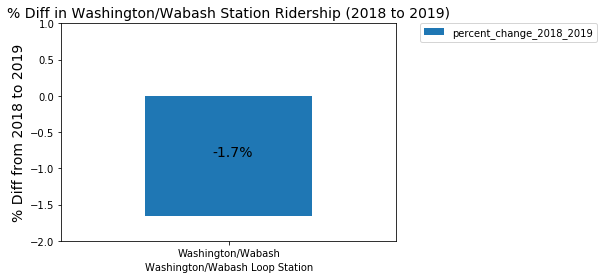

In [325]:
# Bar plot of the percent change in  Ridership from 2018 to 2019 at the Washington/Wabash Station

plt.figure(figsize = (5,5))

ax = wash_wabash_stations_2018_19.plot(kind = 'bar', x = 'stationame', y = ['percent_change_2018_2019'])
ax.set_xlabel('Washington/Wabash Loop Station')
ax.set_ylabel("% Diff from 2018 to 2019", size = 14)
ax.set_title("% Diff in Washington/Wabash Station Ridership (2018 to 2019)", size = 14)
plt.ylim(-2,1)
plt.legend(bbox_to_anchor=(0.6, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 360 )
plt.legend(bbox_to_anchor=(1.6, 1),borderaxespad=0)


for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.3    
    y = p.get_y() + p.get_height()/2
    ax.annotate(n, (x,y), size = 14, color = 'black')
    
plt.show()